In [47]:
def compnext(pattern):
    m = len(pattern)
    next = [0] * m
    k = 0
    for q in range(1, m):
        while k > 0 and pattern[k] != pattern[q]:
            k = next[k - 1]
        if pattern[k] == pattern[q]:
            k = k + 1
        next[q] = k
    return next

def kmp(text, pattern):
    count = 0
    n = len(text)
    m = len(pattern)
    table = compnext(pattern)
    q = 0
    for i in range(n):
        while q > 0 and pattern[q] != text[i]:
            count+=1
            q = table[q - 1]
        if pattern[q] == text[i]:
            count+=1
            q = q + 1
        if q == m:
            return count
    return count

def naive(text,pat):
    count = 0
    i = 0
    j = 0
    while(j<len(text)):
        if(pat[i] != text[j]):
            count+=1
            j = j-i+1
            i = 0
        else:
            if i == len(pat)-1:
                return count
            else:
                i+=1
                j+=1
    return count

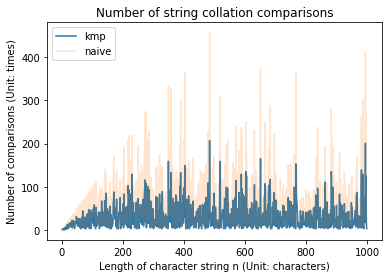

In [55]:
import random
import string
from matplotlib import pyplot
random.seed(10)
dat = "abcd"
kmplist = []
naivelist = []
for n in range(1,1000):
    s = ''.join([random.choice(dat) for i in range(n)])
    kmplist.append(kmp(s, "aab"))
    naivelist.append(naive(s,"aab"))

#グラフの描画
x = list(range(1,1000))
pyplot.plot(x, kmplist, label='kmp')
pyplot.plot(x, naivelist, label='naive', alpha = 0.2)

#グラフタイトル
pyplot.title('Number of string collation comparisons')

#グラフの軸
pyplot.xlabel('Length of character string n (Unit: characters)')
pyplot.ylabel('Number of comparisons (Unit: times)')

#グラフの凡例
pyplot.legend()

pyplot.show()